In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot
import py_helpers.group_apply as ga
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [2]:
file = uproot.open("data/peschke_208_nLayerTrigger_7_particlegun.root")

In [3]:
file.keys()

[b'MCParticles;2',
 b'MCParticles;1',
 b'TRGKLMHits;2',
 b'TRGKLMHits;1',
 b'KLMDigits;2',
 b'KLMDigits;1',
 b'KLMTrgSummary;2',
 b'KLMTrgSummary;1']

In [4]:
file["KLMDigits"].keys()

[b'event_nr',
 b'strip',
 b'charge',
 b'ctime',
 b'Subdetector',
 b'TDC',
 b'time',
 b'sector',
 b'section',
 b'layer',
 b'plane']

In [5]:
MCParticles = file["MCParticles"].pandas.df()


KLMDigits = file["KLMDigits"].pandas.df()



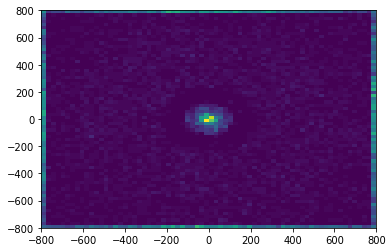

In [6]:
df1 = MCParticles
dummy = plt.hist2d(df1["x_Decay"],df1["y_Decay"],bins=70)

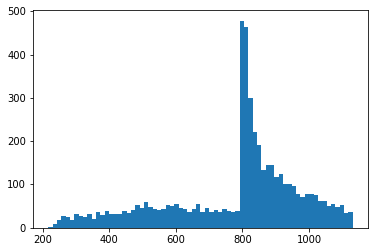

In [7]:
df1 = MCParticles[MCParticles.PDG ==13]
dummy = plt.hist(np.sqrt( df1["x_Decay"]**2 + df1["y_Decay"]**2),bins=70)

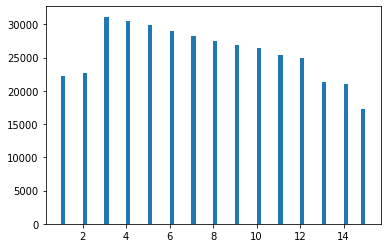

In [8]:
dummy = plt.hist(KLMDigits.layer, bins= 70)

In [9]:
MCParticles["theta"] = np.arctan2(np.sqrt(MCParticles["px"]*MCParticles["px"]+MCParticles["py"]*MCParticles["py"]),MCParticles["pz"])
MCParticles["phi"]   = np.arctan2(MCParticles["py"],MCParticles["px"])
MC_Muon = MCParticles[(MCParticles.PDG == 13)| (MCParticles.PDG == -13)]

In [10]:
config = pd.read_csv("configuration/KLM_acceptance_revers.csv", delimiter = ";")  

In [11]:
KLMDigits_with_accaptance = KLMDigits.merge(config, on=["Subdetector","section","sector"])
KLMDigits_with_accaptance

,event_nr,strip,charge,ctime,Subdetector,TDC,time,sector,section,layer,plane,theta_min,theta_max,phi_min,phi_max
0,1,52.0,3155.0,0.0,1.0,21.0,20.634197,8.0,1.0,1.0,0.0,0.0,1.5,-1.5,0.0
1,1,6.0,3287.0,0.0,1.0,14.0,13.756131,8.0,1.0,1.0,1.0,0.0,1.5,-1.5,0.0
2,1,54.0,3321.0,0.0,1.0,22.0,21.616777,8.0,1.0,2.0,0.0,0.0,1.5,-1.5,0.0
3,1,36.0,3389.0,0.0,1.0,15.0,14.738712,8.0,1.0,2.0,1.0,0.0,1.5,-1.5,0.0
4,22,4.0,3350.0,0.0,1.0,15.0,14.738712,8.0,1.0,1.0,0.0,0.0,1.5,-1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384366,9979,13.0,0.0,0.0,1.0,0.0,28.634769,6.0,1.0,14.0,0.0,0.0,1.5,-3.5,-1.5
384367,9979,3.0,0.0,0.0,1.0,0.0,22.936607,6.0,1.0,14.0,1.0,0.0,1.5,-3.5,-1.5
384368,9979,12.0,0.0,0.0,1.0,0.0,29.452286,6.0,1.0,15.0,0.0,0.0,1.5,-3.5,-1.5
384369,9979,13.0,0.0,0.0,1.0,0.0,29.452286,6.0,1.0,15.0,0.0,0.0,1.5,-3.5,-1.5


In [16]:
c_BKLM = 1
c_EKLM = 2
c_BKLM_BackwardSection = 0
c_BKLM_ForwardSection = 1
c_EKLM_BackwardSection = 1
c_EKLM_ForwardSection = 2

i_sector_EKLM_ForwardSection  = 0
i_sector_BKLM_ForwardSection   = 1
i_sector_BKLM_BackwardSection  = 2
i_sector_EKLM_BackwardSection  = 3

KLMDigits_with_accaptance["i_sector"] = i_sector_EKLM_ForwardSection * ((KLMDigits_with_accaptance["Subdetector"] == c_EKLM) & (KLMDigits_with_accaptance["section"] == c_EKLM_ForwardSection)) + \
                                          i_sector_BKLM_ForwardSection * ((KLMDigits_with_accaptance["Subdetector"] == c_BKLM) & (KLMDigits_with_accaptance["section"] == c_BKLM_ForwardSection)) + \
                                          i_sector_BKLM_BackwardSection* ((KLMDigits_with_accaptance["Subdetector"] == c_BKLM) & (KLMDigits_with_accaptance["section"] == c_BKLM_BackwardSection)) + \
                                          i_sector_EKLM_BackwardSection* ((KLMDigits_with_accaptance["Subdetector"] == c_EKLM) & (KLMDigits_with_accaptance["section"] == c_EKLM_BackwardSection)) 



In [17]:
df_muon_digits =  MC_Muon.merge(KLMDigits_with_accaptance, on = "event_nr")


Text(0.5, 0, 'theta')

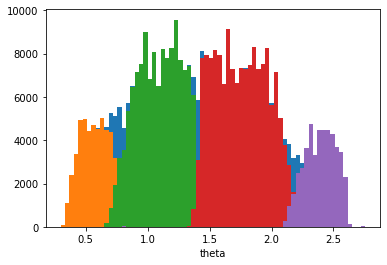

In [18]:
h0 = plt.hist(df_muon_digits.theta,bins=70)
dummy = plt.hist(df_muon_digits[df_muon_digits.i_sector  == i_sector_EKLM_ForwardSection].theta,bins=h0[1])

dummy = plt.hist(df_muon_digits[df_muon_digits.i_sector  == i_sector_BKLM_ForwardSection].theta,bins=h0[1])
dummy = plt.hist(df_muon_digits[df_muon_digits.i_sector  == i_sector_BKLM_BackwardSection].theta,bins=h0[1])
dummy = plt.hist(df_muon_digits[df_muon_digits.i_sector  == i_sector_EKLM_BackwardSection].theta,bins=h0[1])
plt.xlabel("theta")

In [100]:
len(MC_Muon)

10006

In [101]:
len(df_muon_digits)

384614

In [105]:
len(df_muon_digits.groupby("event_nr").max())

9693

0.9687187687387567